# Домашнее задание 4 
(Визуальный анализ данных)

- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индекс
- lat - Широта
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

## Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.1 
Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kc_house_data.csv', encoding='windows-1251')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 
Изучите стоимости недвижимости

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

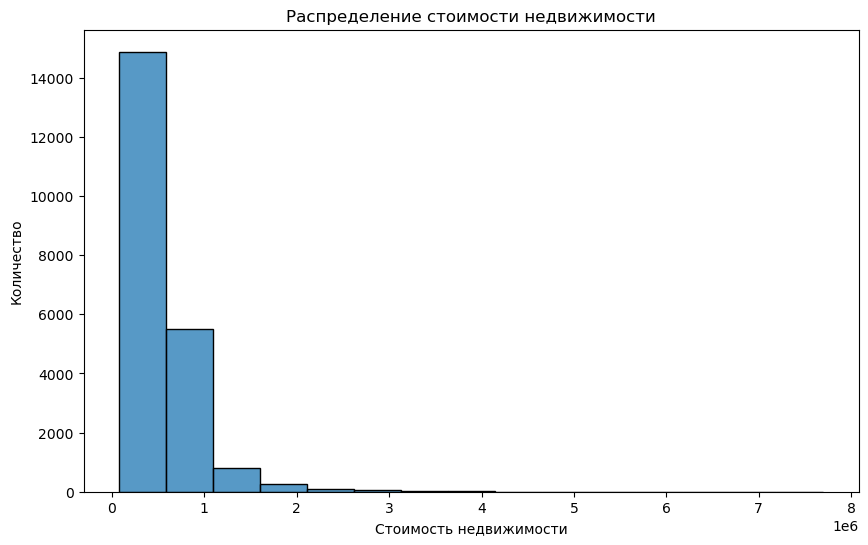

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=15)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Количество');

### *Вывод*:
с наименьшей стоимостью недвижимости наибольшое количество домов, и наоборот, с увеличением стоимости количество домов снижается.

### 1.3 
Изучите распределение квадратуры жилой

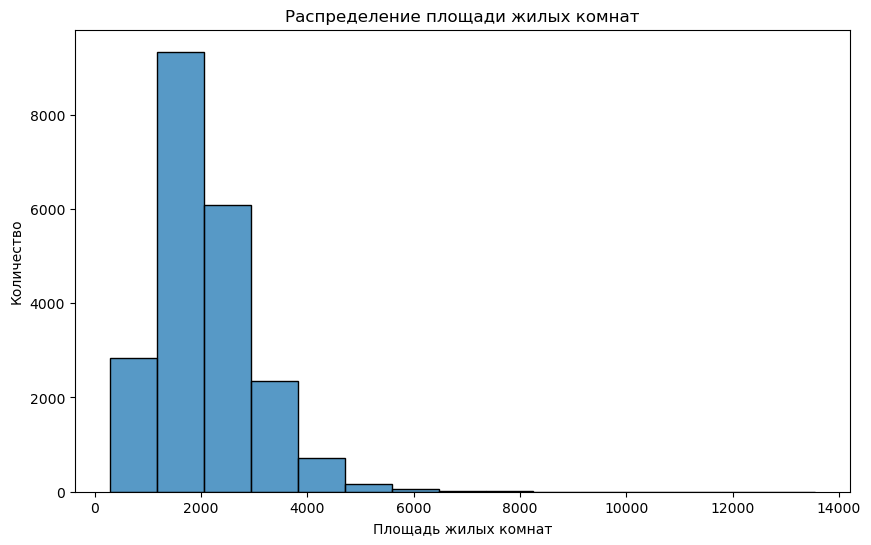

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=15)
plt.title('Распределение площади жилых комнат')
plt.xlabel('Площадь жилых комнат')
plt.ylabel('Количество');

### *Вывод*: 
количество домов больше тех, в которых площадь жилых комнат составляет меньше 2000 кв.м.

### 1.4 
Изучите распределение года постройки

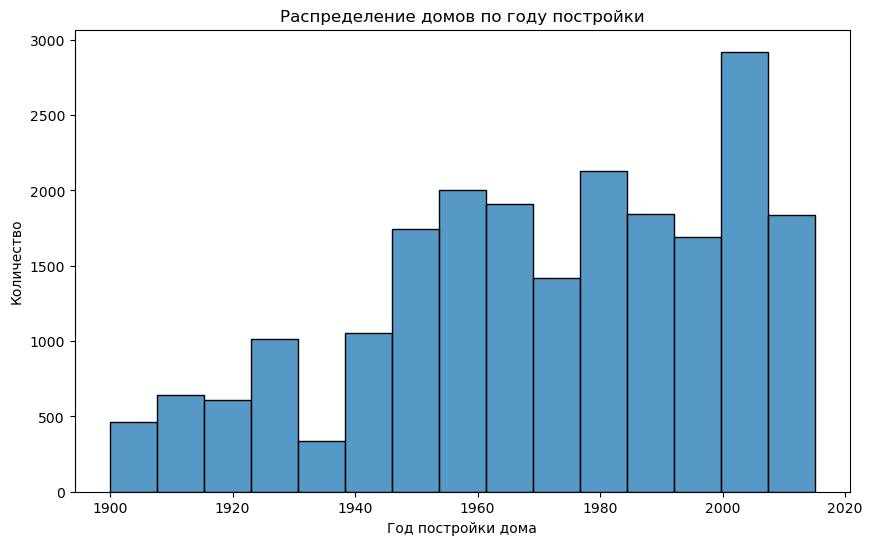

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'], bins=15)
plt.title('Распределение домов по году постройки')
plt.xlabel('Год постройки дома')
plt.ylabel('Количество');

### *Вывод*: 
из графика видго, что с увеличением года постройки количество домов также увеличивается, и 
после 2000 года количество построенных домов составило около 3000 тыс.

## Задача 2
- Постройте график
- Сделайте выводы

### 2.1 
Изучите распределение домов от наличия вида на набережную

In [7]:
data1 = df['waterfront'].value_counts()
data1.index = ['no', 'yes']
data1.head()

no     21450
yes      163
Name: waterfront, dtype: int64

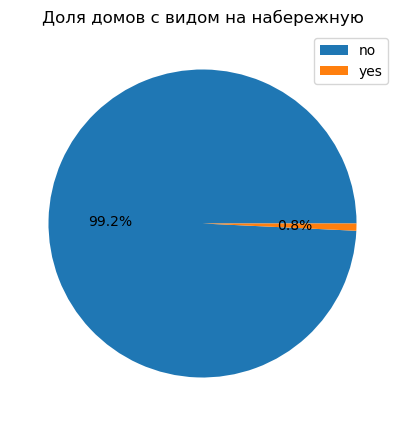

In [8]:
plt.figure(figsize=(5, 5))
plt.pie(data1, autopct='%1.1f%%')
plt.title('Доля домов с видом на набережную')
plt.legend(data1.index);

### *Вывод*:
доля домов с видом на набережную от общего количества всех домов, незначительная и составляет около 1%.

### 2.2 
Изучите распределение этажей домов

In [9]:
data2 = df['floors'].value_counts()
data2.head()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
Name: floors, dtype: int64

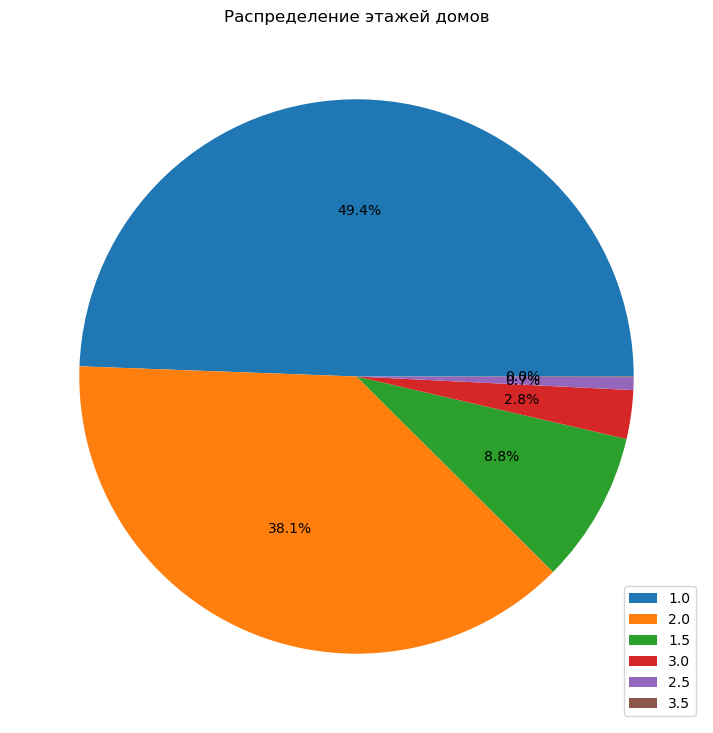

In [10]:
plt.figure(figsize=(9, 9))
plt.pie(data2, autopct='%1.1f%%')
plt.title('Распределение этажей домов')
plt.legend(data2.index);

### *Вывод*:
наибольшее количество домов одноэтажных, что составляет почти 50 % всех домов, доля двухэтажных домов составила 38 %, то есть  основную долю составляют малоэтажные дома.

### 2.3 
Изучите распределение состояния домов

In [11]:
counts = df['condition'].value_counts()
counts.head()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

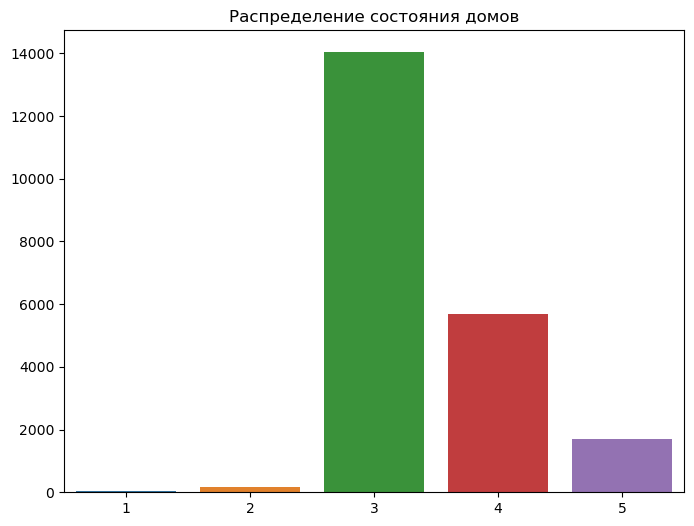

In [12]:
plt.figure(figsize=(8, 6))    
plt.title('Распределение состояния домов')
sns.barplot(x=counts.index, y=counts.values)    
plt.show()

### *Вывод*:
значение от 1 до 5 показывает насколько хорошее состояние дома, то есть порядка 14000 домов находятся в удовлетворительном состоянии и только 5679 и 1701 домов в хорошем и отличном состоянии соответственно. При этом неудовлетворительное состоянии у 202 домов.

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

<b>*Предположим, что Вы хотите купить дом. Проведем визуальный анализ, чтобы выявить от каких факторов будет зависить стоимость Вашего дома.*</b> 

<b>*Для начала, чтобы выявить сильные связи между переменными, посторим матрицу корреляций.*</b>

In [13]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.5] = 0

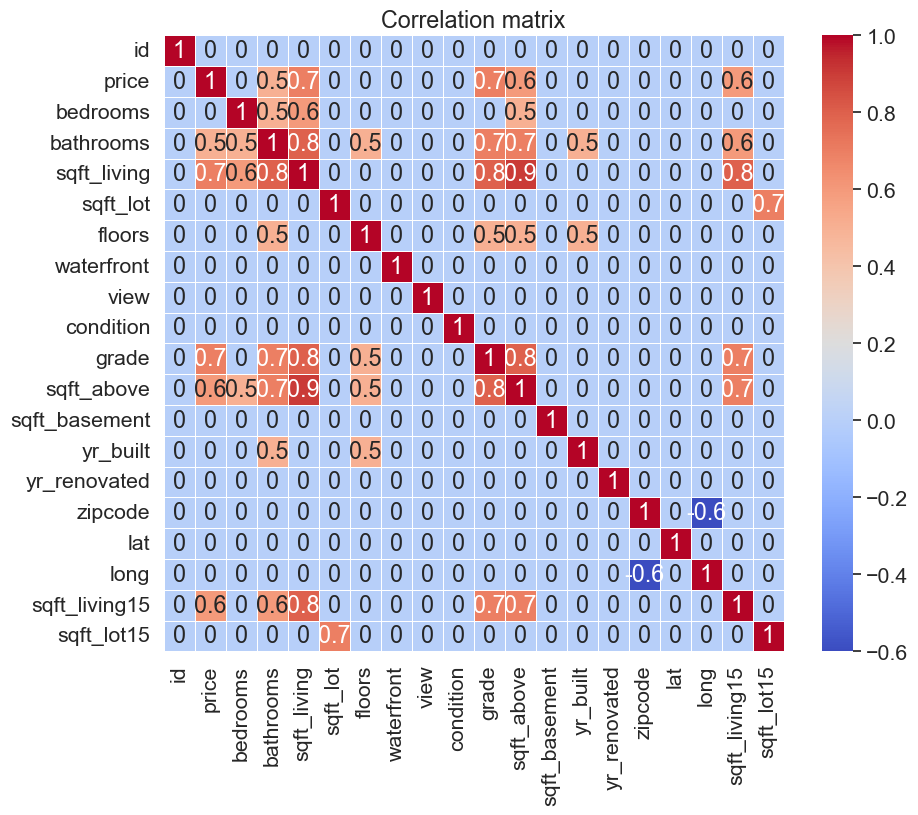

In [14]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

<b>*Из матрицы видно, между стоимостью и площадью жилых помещений, а также классом здания коэфф. корреляции составил 0,7. 
Построим эти графики.*</b>

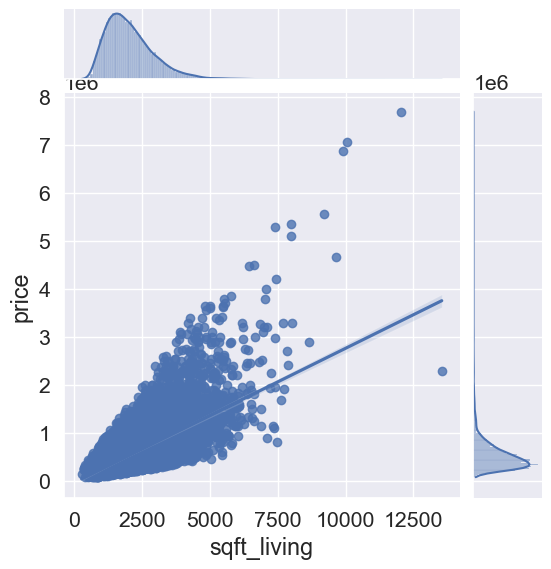

In [15]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

### *Вывод 1*: 
*Из графика явно видно, что чем больше площадь жилых помещений, тем больше стоимость Вашего дома.*

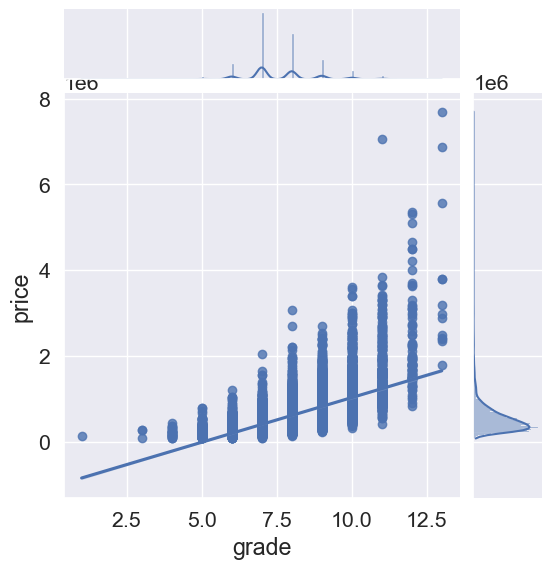

In [16]:
sns.jointplot(x=df['grade'], y=df['price'], kind= 'reg');

### *Вывод 2*: 
*Стоимость выбранного дома будет выше при высоком качестве конструкции и дизайна.*

<b>*А теперь посмотрим как стоимость недвижимости зависит от того, есть ли набержная или нет, а также насколько хороший вид повлияет на стоимость дома.*</b>

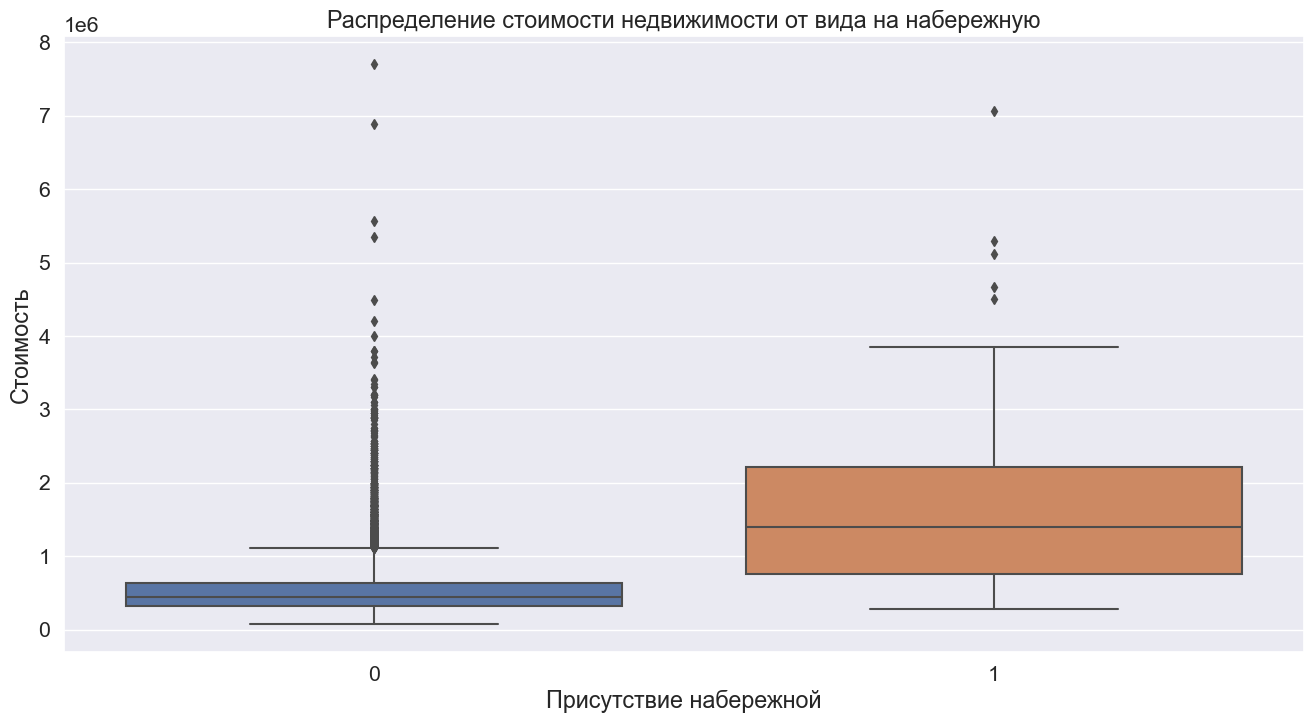

In [17]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['waterfront'], y=df['price'], whis=1.5)
plt.xlabel('Присутствие набережной')
plt.ylabel('Стоимость')
plt.title('Распределение стоимости недвижимости от вида на набережную');

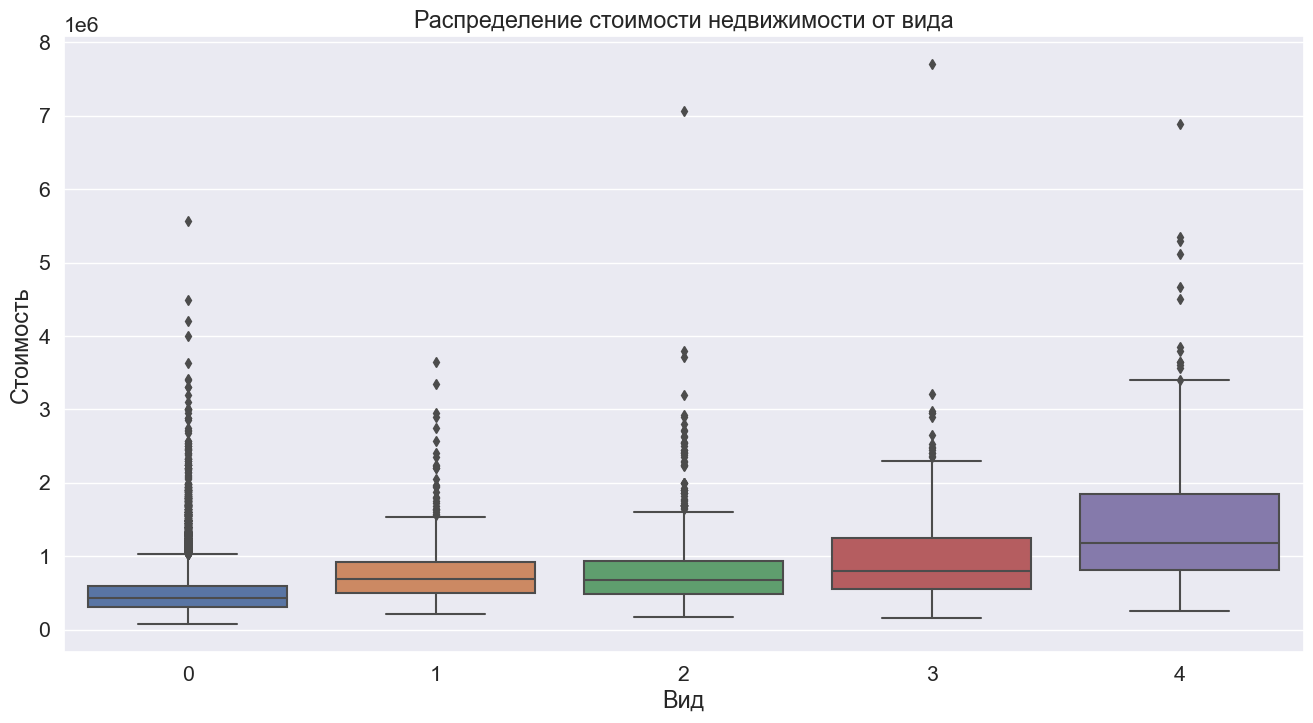

In [18]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['view'], y=df['price'], whis=1.5)
plt.xlabel('Вид')
plt.ylabel('Стоимость')
plt.title('Распределение стоимости недвижимости от вида');

### *Вывод 3*: 
*Расположение дома рядом с набережной и хороший вид гораздо увеличит его стоимость.*

<b>*Кроме того, на стоимость недвижимости также оказывает фактор состояния дома и год постройки.*</b>

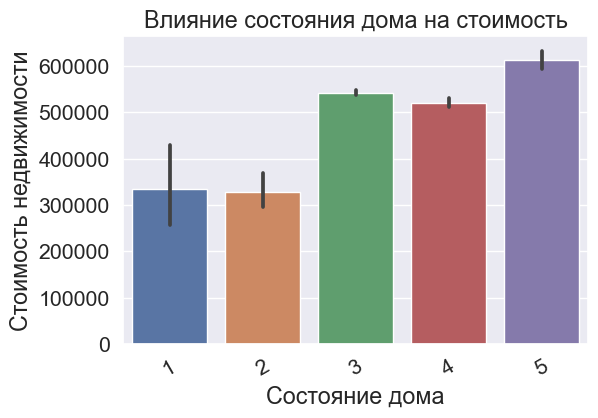

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['condition'], y=df['price'])
plt.title('Влияние состояния дома на стоимость')
plt.xlabel('Состояние дома')
plt.ylabel('Стоимость недвижимости')
plt.xticks(rotation=30);

### *Вывод 4*: 
*Чем выше оценка состояния дома, тем выше его стоимость.*

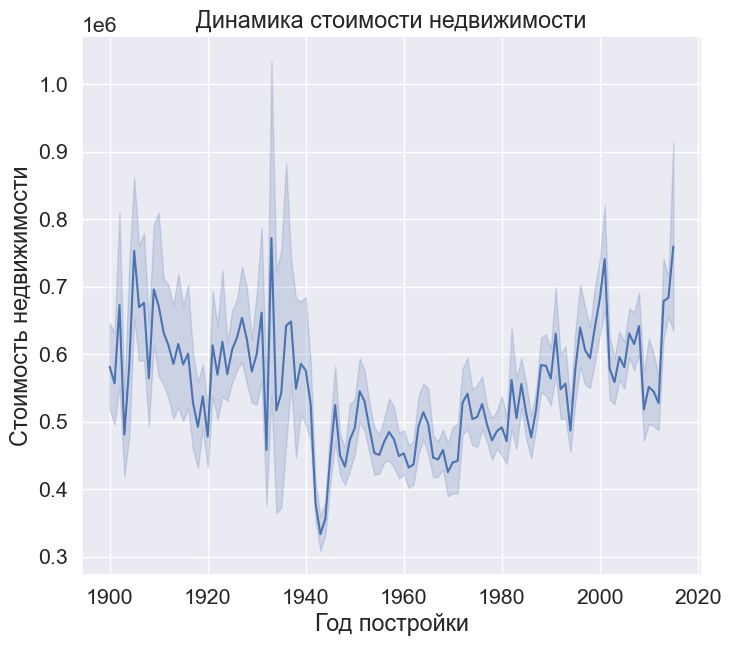

In [20]:
plt.figure(figsize=(8, 7))
sns.lineplot(x=df['yr_built'], y=df['price'])
plt.title('Динамика стоимости недвижимости')
plt.xlabel('Год постройки')
plt.ylabel('Стоимость недвижимости');

### *Вывод 5*: 
*На графике видно, что дома построенные до 1940 года и после 2000 года имеют большую стоимость.*

*Таким образом, все приведенные факторы оказывают значительное влияние на стоимость недвижимости, что следует учитывать при покупке дома.*